# Week One Final Project: Movie Revenue Prediction and Exploration

Where has week one gone! We have one more project for you to put a nice little bow on all of the hard work you've done so far. For this project, be persistent, be curious, and ask questions if you get stuck!

## The Project

You and your teammates will create one prediction model and *AT LEAST* three plots or charts. Everyone will present their model and their charts during the final session of the day.
* Model predictions will be ranked according to their r-squared values and we will crown a winner!
* Your plots should be driven by curiosity. Everyone will present at least one plot.

## Helper Functions

We've provided helper functions down below. If you need help remembering what they do, refer to the `airbnb_solution.ipynb` example.

In [2]:
# We'll use these packages
import pandas as pd
import numpy as np
import ast
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer

pd.set_option('display.max_columns', 100)

# Read in the data!
spotify_data = pd.read_csv("spotify_dataset.csv")

In [3]:
spotify_data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
# Helper function for splitting out text data that differs by column, but is representing a category
# like genre, or artist, but not something track name

#the code below splits out genres into their own categories
genre_dummies = pd.get_dummies(spotify_data["track_genre"])
genre_dummies

,acoustic,afrobeat,alt-rock,alternative,ambient,anime,black-metal,bluegrass,blues,brazil,breakbeat,british,cantopop,chicago-house,children,chill,classical,club,comedy,country,dance,dancehall,death-metal,deep-house,detroit-techno,disco,disney,drum-and-bass,dub,dubstep,edm,electro,electronic,emo,folk,forro,french,funk,garage,german,gospel,goth,grindcore,groove,grunge,guitar,happy,hard-rock,hardcore,hardstyle,...,jazz,k-pop,kids,latin,latino,malay,mandopop,metal,metalcore,minimal-techno,mpb,new-age,opera,pagode,party,piano,pop,pop-film,power-pop,progressive-house,psych-rock,punk,punk-rock,r-n-b,reggae,reggaeton,rock,rock-n-roll,rockabilly,romance,sad,salsa,samba,sertanejo,show-tunes,singer-songwriter,ska,sleep,songwriter,soul,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [6]:
genre_dummies_columns = genre_dummies.columns

In [7]:
genre_dummies_columns

Index(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime',
       'black-metal', 'bluegrass', 'blues', 'brazil',
       ...
       'spanish', 'study', 'swedish', 'synth-pop', 'tango', 'techno', 'trance',
       'trip-hop', 'turkish', 'world-music'],
      dtype='object', length=114)

In [8]:
#genre_dummis is it's own dataframe, I want to contatenate it onto my spotify_data
merged_data = pd.concat([spotify_data, genre_dummies], axis=1)
merged_data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,acoustic,afrobeat,alt-rock,alternative,ambient,anime,black-metal,bluegrass,blues,brazil,breakbeat,british,cantopop,chicago-house,children,chill,classical,club,comedy,country,dance,dancehall,death-metal,deep-house,detroit-techno,disco,disney,drum-and-bass,dub,...,jazz,k-pop,kids,latin,latino,malay,mandopop,metal,metalcore,minimal-techno,mpb,new-age,opera,pagode,party,piano,pop,pop-film,power-pop,progressive-house,psych-rock,punk,punk-rock,r-n-b,reggae,reggaeton,rock,rock-n-roll,rockabilly,romance,sad,salsa,samba,sertanejo,show-tunes,singer-songwriter,ska,sleep,songwriter,soul,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [ ]:
# DON'T USE THIS IF YOU DONT HAVE ANY DATA IN A DICTIONARY FORM

# Helper Function: Feature Engineering
# Use this to turn dictionary columns into useful features
# We use the genre column as an example

column = "column"  # FEEL FREE TO CHANGE THIS
number_to_keep = 100

def process_col_name(col_name):
    col_name_list = ast.literal_eval(col_name)
    if not isinstance(col_name_list, list):
        return []
    return [dic['name'] for dic in col_name_list if isinstance(dic, dict) and 'name' in dic]

spotify_data[f'{column}_list'] = spotify_data[column].apply(process_col_name)

# Compute the frequency of each col_name member
freq = pd.Series([name for sublist in spotify_data[f'{column}_list'].tolist() for name in sublist]).value_counts()

# Keep the top 100 most frequent col_name members
top_col_name = freq[:number_to_keep].index.tolist()

# Filter the lists in the column to only include top col_name members
spotify_data[f'{column}_list'] = spotify_data[f'{column}_list'].apply(lambda x: [i for i in x if i in top_col_name])

mlb = MultiLabelBinarizer()

binary_matrix = pd.DataFrame(mlb.fit_transform(spotify_data[f'{column}_list']), columns=mlb.classes_)

# Clean the column names: keep only alphanumeric characters and underscores
binary_matrix.columns = binary_matrix.columns.str.replace('[^0-9a-zA-Z_]', '', regex=True)

# Now, concatenate the binary matrix with the original DataFrame
new_feature_names = binary_matrix.columns
spotify_data = pd.concat([spotify_data, binary_matrix], axis=1)

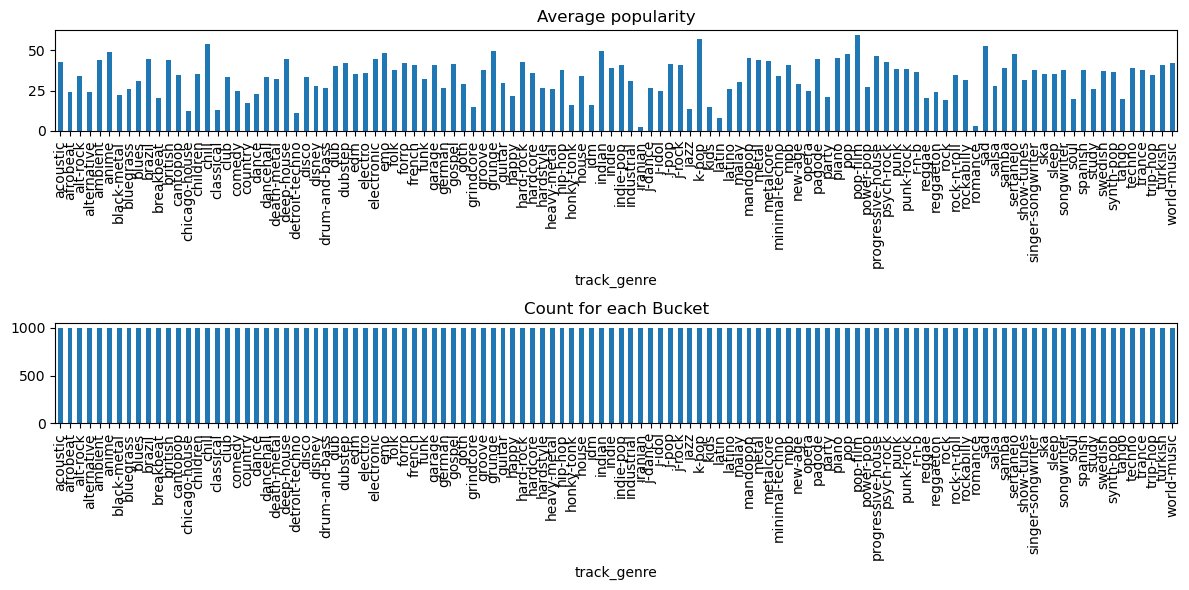

In [9]:
# Helper Function: Two Bar Chart Plots
groupby_variable = "track_genre"
y_value = "popularity"

fig, axs = plt.subplots(2, 1, figsize=(12, 6))
spotify_data.groupby(groupby_variable)[y_value].mean().plot(kind="bar", ax=axs[0], title=f"Average {y_value}")
spotify_data.groupby(groupby_variable)[y_value].count().plot(kind="bar", ax=axs[1], title=f"Count for each Bucket")
fig.tight_layout()

<Axes: xlabel='speechiness', ylabel='popularity'>

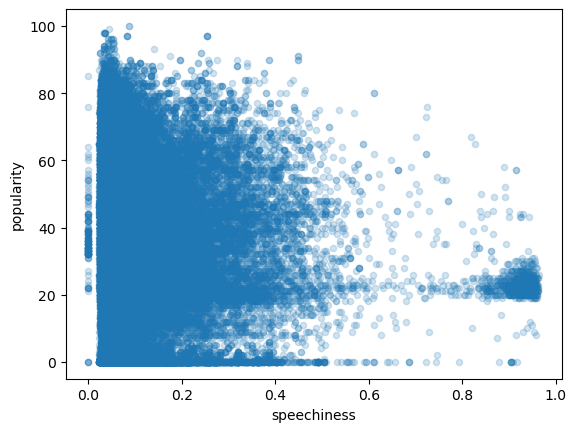

In [14]:
# Helper Function: Scatter Plot

x_value = "speechiness"
y_value = "popularity"

spotify_data.plot(x=x_value, y=y_value, kind="scatter", alpha=0.2)

Training Data Statistics
mean_absolute_error:  18.779486039927324
mean_squared_error 496.5396977251305
R**2 0.0037055265440075758

Validation Data Statistics
mean_absolute_error:  18.665346501893524
mean_squared_error 492.1768378025952
R**2 0.0036390811192880124


C:\Users\ian\AppData\Local\Temp\ipykernel_42444\2161104435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f"predicted_{target}"] = model.predict(train_data[features])
C:\Users\ian\AppData\Local\Temp\ipykernel_42444\2161104435.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data[f"predicted_{target}"] = model.predict(validation_data[features])


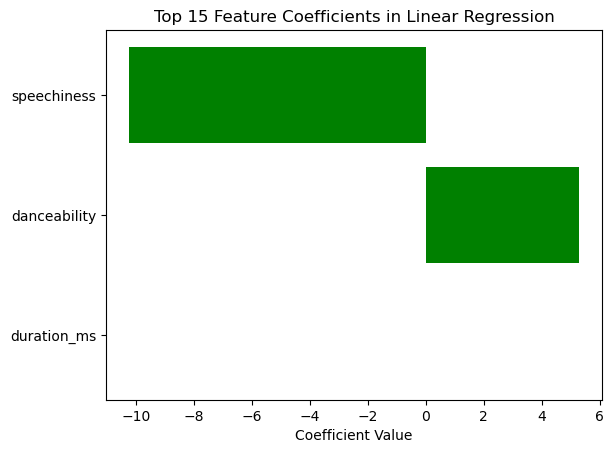

In [15]:
# Helper Function: Model Training
features = ["duration_ms", "danceability", "speechiness"]

target = "popularity"  # LEAVE THIS ALONE
model_type = "linear regression"  # Options: "random forest" or "linear regression"
features_to_show = 15


if model_type == "random forest":
    model = RandomForestRegressor()
elif model_type == "linear regression":
    model = LinearRegression()

shuffled_data = spotify_data.sample(len(spotify_data))  # Shuffle our data
train_data = shuffled_data[:int(len(shuffled_data)*0.8)]
validation_data = shuffled_data[int(len(shuffled_data)*0.8):]

model.fit(train_data[features], train_data[target])

train_data[f"predicted_{target}"] = model.predict(train_data[features])
validation_data[f"predicted_{target}"] = model.predict(validation_data[features])

# How do we measure our success?
print("Training Data Statistics")
print("mean_absolute_error: ", mean_absolute_error(train_data[target], train_data[f"predicted_{target}"]))
print("mean_squared_error", mean_squared_error(train_data[target], train_data[f"predicted_{target}"]))
print("R**2", r2_score(train_data[target], train_data[f"predicted_{target}"]))
print("")

print("Validation Data Statistics")
print("mean_absolute_error: ", mean_absolute_error(validation_data[target], validation_data[f"predicted_{target}"]))
print("mean_squared_error", mean_squared_error(validation_data[target], validation_data[f"predicted_{target}"]))
print("R**2", r2_score(validation_data[target], validation_data[f"predicted_{target}"]))

if model_type == "random forest":
    importances = model.feature_importances_
    indices = np.argsort(importances)[-features_to_show:]  # sort top features

    # Create a figure and a set of subplots
    fig, ax = plt.subplots()

    # Bar plot
    ax.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.title(f'Top {features_to_show} Feature Importances')
    plt.show()

if model_type == "linear regression":
    coefficients = model.coef_
    indices = np.argsort(np.abs(coefficients))[-features_to_show:]  # sort top features by magnitude

    # Create a figure and a set of subplots
    fig, ax = plt.subplots()

    # Bar plot
    ax.barh(range(len(indices)), coefficients[indices], color='g', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Coefficient Value')
    plt.title(f'Top {features_to_show} Feature Coefficients in Linear Regression')
    plt.show()